In [1]:
#convolution : image smoothing (lowpass)

import cv2
import numpy as np
img = cv2.imread('lena.png')
rows, cols = img.shape[:2]
kernel_identity = np.array([[0,0,0], [0,1,0], [0,0,0]])
kernel_3x3 = np.ones((3,3), np.float32) / 9.0 # Divide by 9 to normalize the kernel
kernel_5x5 = np.ones((5,5), np.float32) / 25.0 # Divide by 25 to normalize the kernel
cv2.imshow('Original', img)
# value -1 is to maintain source image depth
output = cv2.filter2D(img, -1, kernel_identity)
cv2.imshow('Identity filter', output)
output = cv2.filter2D(img, -1, kernel_3x3)
cv2.imshow('3x3 filter', output)
output = cv2.filter2D(img, -1, kernel_5x5)
cv2.imshow('5x5 filter', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
#convolution : image sharping

import cv2
import numpy as np
img = cv2.imread('sakura.jpg')
assert img is not None
cv2.imshow('Original', img)
# generating the kernels
kernel_sharpen_1 = np.array([
    [-1,-1,-1], 
    [-1, 9,-1], 
    [-1,-1,-1]])
kernel_sharpen_2 = np.array([
    [1, 1,1], 
    [1,-7,1], 
    [1, 1,1]])
kernel_sharpen_3 = np.array([
    [-1,-1,-1,-1,-1],
    [-1, 2, 2, 2,-1],
    [-1, 2, 8, 2,-1],
    [-1, 2, 2, 2,-1],
    [-1,-1,-1,-1,-1]]) / 8.0
# applying different kernels to the input image
output_1 = cv2.filter2D(img, -1, kernel_sharpen_1)
output_2 = cv2.filter2D(img, -1, kernel_sharpen_2)
output_3 = cv2.filter2D(img, -1, kernel_sharpen_3)
cv2.imshow('Sharpening', output_1)
cv2.imshow('Excessive Sharpening', output_2)
cv2.imshow('Edge Enhancement', output_3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
#morphological filter

import cv2
import numpy as np

img0 = cv2.imread('morphology_cell.png', cv2.IMREAD_GRAYSCALE)
retval, img = cv2.threshold(img0, 225, 255, cv2.THRESH_BINARY)
#Square Kernel
#kernel = np.ones((5, 5), np.uint8)
#Elliptical Kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
"""
kernel = np.array(
         [[0, 0, 1, 0, 0],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [0, 0, 1, 0, 0]], dtype=np.uint8)
"""
print(kernel)
img_erosion = cv2.erode(img, kernel, iterations=1)   #收縮
img_dilation = cv2.dilate(img, kernel, iterations=1) #擴張
img_opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel) #先收縮再擴張
img_closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel) #先擴張再收縮
cv2.imshow('Input', img)
cv2.imshow('Erosion', img_erosion)
cv2.imshow('Dilation', img_dilation)
cv2.imshow('Opening', img_opening)
cv2.imshow('Closing', img_closing)
cv2.waitKey()
cv2.destroyAllWindows()

[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

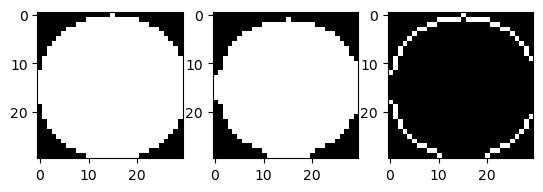

In [17]:
#gear tooth inspection using morphological filter

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('gear_tooth.png', cv2.IMREAD_GRAYSCALE)
retval, img_a = cv2.threshold(img, 225, 255, cv2.THRESH_BINARY)

kernel_dot = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel_hole = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))
print(kernel_hole)
kernel_hole_e = cv2.erode(kernel_hole, kernel_dot, iterations=1)
kernel_hole_ring = kernel_hole - kernel_hole_e

plt.subplot(1,3,1)
plt.imshow(kernel_hole, cmap = 'gray')
plt.subplot(1,3,2)
plt.imshow(kernel_hole_e, cmap = 'gray')
plt.subplot(1,3,3)
plt.imshow(kernel_hole_ring, cmap = 'gray')

img_b = cv2.erode(img_a, kernel_hole_ring, iterations=1) # erode 找到缺口的位置
img_c = cv2.dilate(img_b, kernel_hole, iterations=1)     # 在位置上 dilate 擴張成 kernel_hole 大小
img_d = cv2.bitwise_or(img, img_c)                      # 填滿孔洞大小 做 OR

cv2.imshow('(a)', img_a)
cv2.imshow('(b)', img_b)
cv2.imshow('(c)', img_c)
cv2.imshow('(d)', img_d)

cv2.waitKey()
cv2.destroyAllWindows()

###### %%writefile test
## Homework 2 (Morphological Filter)
1. Input image from gear_tooth.png.
2. The objective is to detect missing teeth using a sequence of morphological filters.
3. Optional: Design a set of structure elements: <b>gear_body</b>, <b>sampling_ring_spacer</b>, <b>sampling_ring_width</b>, <b>tip_spacing</b>, <b>defect_cue</b>
4. Apply morphological filters using the structure elements to generate the figures (e), (f), (g), (h)
<br>&nbsp;(e) opening it with structure element <b>gear_body</b> to get rid of the teeth, dilating that with structure element <b>sampling_ring_spacer</b> to bring it out to the base of the teeth, dilating that with the structure element <b>sampling_ring_width</b> to bring the next image out to the tip of the teeth, and subtracting the last two results to get a ring that just fits over the teeth.
<br>&nbsp;(f) AND it with the original image to produce an image of just the teeth.
<br>&nbsp;(g) dilating the teeth image with the structure element <b>tip_spacing</b> produces the solid ring image which has spaces in the solid ring wherever there are defects in the teeth.
<br>&nbsp;(h) subtracting it from the sampling ring leaves only the defects, which are dilated by structure element <b>defect_cue</b>.
5. Mark the defected gears using <b>red rectangles</b> on the output images.
6. Write a simple report in a separate cell.
7. Upload your Jupyter code file (*.ipynb)
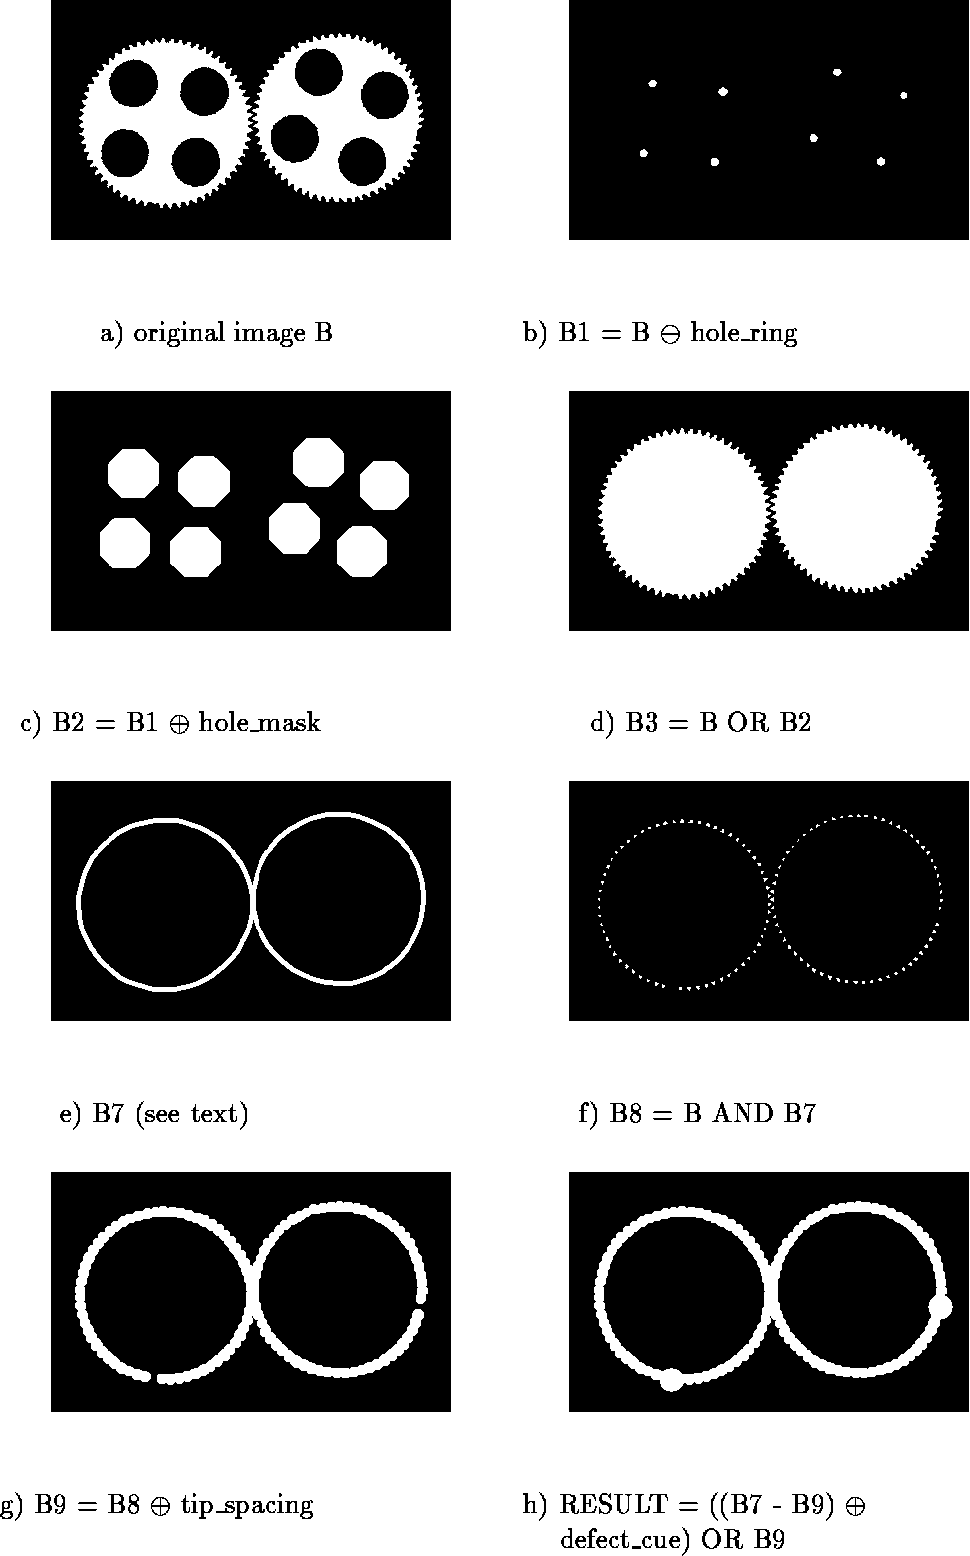

(173, 292)


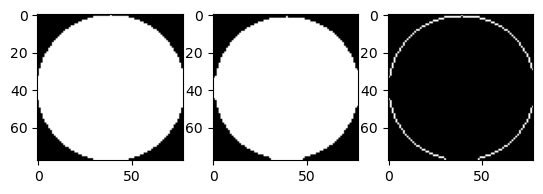

In [2]:
#gear tooth inspection using morphological filter

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('gear_tooth.png', cv2.IMREAD_GRAYSCALE)
print(img.shape)
retval, img_a = cv2.threshold(img, 225, 255, cv2.THRESH_BINARY)

kernel_dot = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel_hole = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))
kernel_hole_e = cv2.erode(kernel_hole, kernel_dot, iterations=1)
kernel_hole_ring = kernel_hole - kernel_hole_e

kernel_dot2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel_hole2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(78,78))
kernel_hole_e2 = cv2.erode(kernel_hole2, kernel_dot2, iterations=1)
kernel_hole_ring2 = kernel_hole2 - kernel_hole_e2

gear_body = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(81,81))
gear_body2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(87,87))
tip_spacing = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

plt.subplot(1,3,1)
plt.imshow(kernel_hole2, cmap = 'gray')
plt.subplot(1,3,2)
plt.imshow(kernel_hole_e2, cmap = 'gray')
plt.subplot(1,3,3)
plt.imshow(kernel_hole_ring2, cmap = 'gray')

img_b = cv2.erode(img_a, kernel_hole_ring, iterations=1) # erode 找到缺口的位置
img_c = cv2.dilate(img_b, kernel_hole, iterations=1)     # 在位置上 dilate 擴張成 kernel_hole 大小
img_d = cv2.bitwise_or(img, img_c)                      # 填滿孔洞大小 做 OR
img_e_dot = cv2.erode(img_d, kernel_hole_ring2, iterations=1)
img_e1 = cv2.dilate(img_e_dot, gear_body, iterations=1) 
img_e2 = cv2.dilate(img_e_dot, gear_body2, iterations=1)
img_e = img_e2-img_e1

img_f = cv2.bitwise_and(img, img_e)
retval, img_f = cv2.threshold(img_f, 100, 255, cv2.THRESH_BINARY)
img_g = cv2.dilate(img_f, tip_spacing, iterations=1)

cv2.imshow('(a)', img_a)
cv2.imshow('(b)', img_b)
cv2.imshow('(c)', img_c)
cv2.imshow('(d)', img_d)
#cv2.imshow('(e_d)', img_e_dot)
cv2.imshow('(e)', img_e)
cv2.imshow('(f)', img_f)
cv2.imshow('(g)', img_g)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
kernel_hole_mask = np.array(
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0],
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0],
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0],
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0],
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0],
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0],
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0],
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0],
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0],
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0],
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0],
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0],
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0],
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0],
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0],
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0],
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0],
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0],
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0],
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0],
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0],
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0],
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0],
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0],
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0],
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0],
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]], dtype=np.uint8)